In [71]:
import pandas as pd
import numpy as np

In [205]:
christmas_pdf=pd.read_excel(r'C:\Users\Owner\Documents\christmas_movie_list_with_tconst.xlsx', 
              dtype={'title': str, 'year': int, 'links': str})

christmas_pdf.drop(columns = ['title','year','links'], inplace = True)
print("initial row count: ",christmas_pdf.count())
christmas_pdf.drop_duplicates(inplace = True)
print("de-duped row count: ",christmas_pdf.count())

initial row count:  tconst    1302
dtype: int64
de-duped row count:  tconst    1193
dtype: int64


In [204]:
christmas_pdf.head()

,tconst
0,tt1942787
1,tt13782052
2,tt1846442
3,tt0436855
4,tt6303962


In [207]:
christmas_pdf.count()

tconst    1193
dtype: int64

In [202]:
imdb_df = pd.read_csv(r'C:\Users\Owner\Documents\title_basics.tsv', 
                      sep='\t',
                      na_values = r'\N',
                      dtype = {'startYear': pd.Int64Dtype()}
                     )

imdb_df['genres_list'] = imdb_df['genres'].str.split(',')
imdb_df.drop(columns = ['genres','endYear','isAdult'], inplace = True)

imdb_df.dtypes

C:\Users\Owner\AppData\Local\Temp\ipykernel_9408\4156311996.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  imdb_df = pd.read_csv(r'C:\Users\Owner\Documents\title_basics.tsv',


tconst            object
titleType         object
primaryTitle      object
originalTitle     object
startYear          Int64
runtimeMinutes    object
genres_list       object
dtype: object

In [192]:
imdb_movie_df=imdb_df

In [206]:
main_pdf = pd.merge(christmas_pdf, imdb_movie_df.rename(columns={'primaryTitle':'title','startYear':'year'}), on=['tconst'],  how='inner')
main_pdf=main_pdf[['tconst', 'year', 'title','originalTitle','titleType','runtimeMinutes','genres_list']]
main_pdf.count()

tconst            1193
year              1193
title             1193
originalTitle     1193
titleType         1193
runtimeMinutes    1183
genres_list       1193
dtype: int64

In [208]:
main_pdf.head()

,tconst,year,title,originalTitle,titleType,runtimeMinutes,genres_list
0,tt1942787,2011,3 Holiday Tails,3 Holiday Tails,tvMovie,88.0,"[Comedy, Family, Romance]"
1,tt13782052,2021,1000 Miles from Christmas,A mil kilómetros de la Navidad,movie,102.0,"[Comedy, Romance]"
2,tt1846442,2011,12 Dates of Christmas,12 Dates of Christmas,tvMovie,90.0,"[Comedy, Family, Fantasy]"
3,tt0436855,2004,The Twelve Days of Christmas Eve,The Twelve Days of Christmas Eve,tvMovie,85.0,"[Comedy, Drama, Fantasy]"
4,tt6303962,2017,12 Days of Giving,12 Days of Giving,tvMovie,85.0,"[Comedy, Drama, Family]"


In [209]:
ratings_df = pd.read_csv(r'C:\Users\Owner\Documents\title_ratings.tsv', 
                      sep='\t',
                      na_values = r'\N'
                     )

In [160]:
ratings_df.head()

,tconst,averageRating,numVotes
0,tt0000001,5.7,1922
1,tt0000002,5.8,259
2,tt0000003,6.5,1734
3,tt0000004,5.6,174
4,tt0000005,6.2,2545


In [210]:
main_pdf=main_pdf.merge(ratings_df, on='tconst', how = 'inner')

In [211]:
main_pdf.count()

tconst            1190
year              1190
title             1190
originalTitle     1190
titleType         1190
runtimeMinutes    1182
genres_list       1190
averageRating     1190
numVotes          1190
dtype: int64

In [238]:
movies_per_year = main_pdf[['tconst','year','titleType']].groupby(['year','titleType']).count()
movies_per_year=movies_per_year.rename(columns={"tconst": "movie_count"})
display(movies_per_year)

movie_count
year titleType             
1931 short                1
1932 short                2
1933 short                1
1935 movie                1
     short                1
...                     ...
2021 movie               20
     short                1
     tvMovie             95
     tvSeries             1
2022 tvMovie              3

[202 rows x 1 columns]

In [245]:
movies_per_year.unstack()

movie_count                                                        \
titleType       movie short tvEpisode tvMiniSeries tvMovie tvSeries tvShort   
year                                                                          
1931              NaN   1.0       NaN          NaN     NaN      NaN     NaN   
1932              NaN   2.0       NaN          NaN     NaN      NaN     NaN   
1933              NaN   1.0       NaN          NaN     NaN      NaN     NaN   
1935              1.0   1.0       NaN          NaN     NaN      NaN     NaN   
1936              NaN   2.0       NaN          NaN     NaN      NaN     NaN   
...               ...   ...       ...          ...     ...      ...     ...   
2018             13.0   NaN       1.0          NaN    73.0      NaN     NaN   
2019             18.0   2.0       1.0          NaN    77.0      NaN     NaN   
2020             17.0   NaN       1.0          1.0    82.0      NaN     NaN   
2021             20.0   1.0       NaN          NaN    95.0      1.0     NaN   
2022              NaN   NaN       NaN          NaN     3.0      NaN     NaN   

                           
titleType tvSpecial video  
year                       
1931            NaN   NaN  
1932            NaN   NaN  
1933            NaN   NaN  
1935            NaN   NaN  
1936            NaN   NaN  
...             ...   ...  
2018            NaN   NaN  
2019            NaN   1.0  
2020            NaN   NaN  
2021            NaN   NaN  
2022            NaN   NaN  

[85 rows x 9 columns]

<AxesSubplot:xlabel='year'>

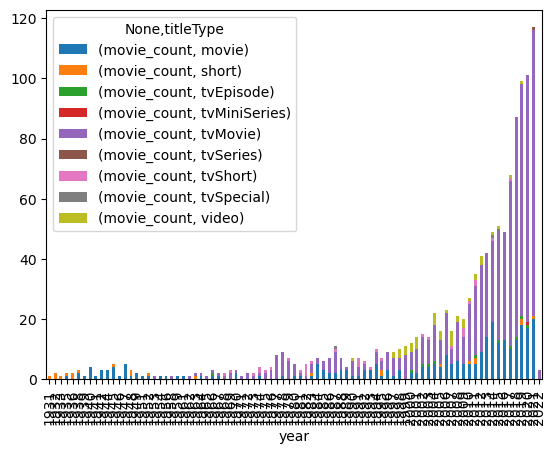

In [244]:
movies_per_year.unstack().plot.bar(stacked = True)

<AxesSubplot:xlabel='year'>

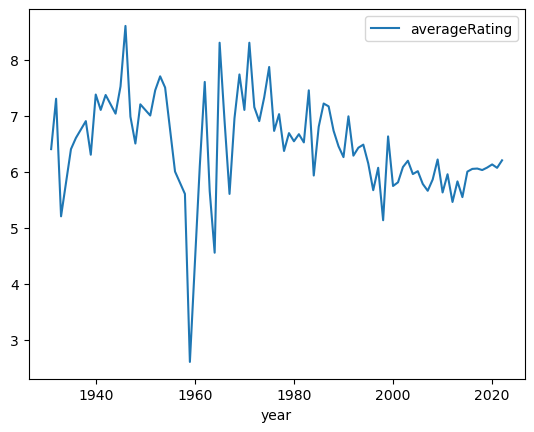

In [213]:
ratings_per_year = main_pdf[['averageRating','year']].groupby('year', dropna=True).mean()
ratings_per_year.plot()

<AxesSubplot:xlabel='year'>

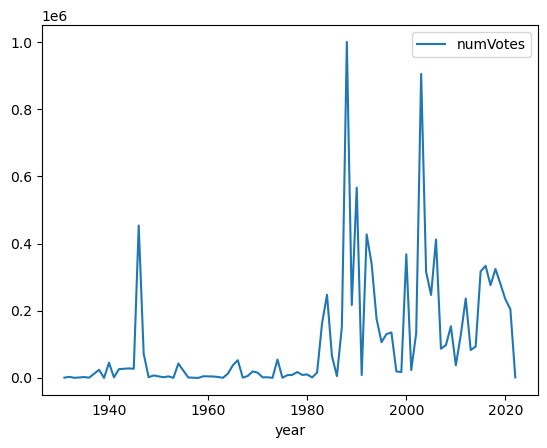

In [214]:
reviews_per_year = main_pdf[['numVotes','year']].groupby('year', dropna=True).sum()
reviews_per_year.plot()

In [215]:
main_pdf[['numVotes']].quantile(0.2)

numVotes    423.8
Name: 0.2, dtype: float64

In [217]:
main_pdf[main_pdf['numVotes']>423].sort_values(by=['averageRating','numVotes'],ascending=False).head(10)

,tconst,year,title,originalTitle,titleType,runtimeMinutes,genres_list,averageRating,numVotes
652,tt0038650,1946,It's a Wonderful Life,It's a Wonderful Life,movie,130.0,"[Drama, Family, Fantasy]",8.6,453750
1014,tt7787044,2017,The Christmas Wishing Tree,The Christmas Wishing Tree,tvEpisode,120.0,"[Drama, History, Romance]",8.4,760
627,tt0060345,1966,How the Grinch Stole Christmas!,How the Grinch Stole Christmas!,tvMovie,26.0,"[Animation, Comedy, Family]",8.3,51664
30,tt0059026,1965,A Charlie Brown Christmas,A Charlie Brown Christmas,tvMovie,25.0,"[Animation, Comedy, Drama]",8.3,37734
1044,tt0067209,1971,The Homecoming: A Christmas Story,The Homecoming: A Christmas Story,tvMovie,100.0,"[Drama, Family]",8.3,1820
512,tt0095016,1988,Die Hard,Die Hard,movie,132.0,"[Action, Thriller]",8.2,872646
1111,tt0084701,1982,The Snowman,The Snowman,tvShort,26.0,"[Animation, Family, Fantasy]",8.2,14726
529,tt0075988,1977,Emmet Otter's Jug-Band Christmas,Emmet Otter's Jug-Band Christmas,tvMovie,48.0,"[Comedy, Drama, Family]",8.2,3993
679,tt4729430,2019,Klaus,Klaus,movie,96.0,"[Adventure, Animation, Comedy]",8.1,148542
164,tt0251282,1987,A Muppet Family Christmas,A Muppet Family Christmas,tvMovie,47.0,"[Comedy, Family, Musical]",8.1,4052


In [220]:
main_pdf[main_pdf['numVotes']>423].sort_values(by=['averageRating','numVotes'],ascending=False).tail(10)

,tconst,year,title,originalTitle,titleType,runtimeMinutes,genres_list,averageRating,numVotes
279,tt4076824,2015,Beverly Hills Christmas,Beverly Hills Christmas,movie,86.0,[Family],3.1,496
1117,tt1984279,2012,The Swan Princess: Christmas,The Swan Princess: Christmas,video,83.0,"[Adventure, Animation, Comedy]",3.0,1315
882,tt3922810,2014,Santa Claws,Santa Claws,movie,86,"[Family, Fantasy]",3.0,812
784,tt0367623,2003,Christmas Vacation 2: Cousin Eddie's Island Ad...,Christmas Vacation 2: Cousin Eddie's Island Ad...,tvMovie,83.0,[Comedy],2.7,3496
879,tt0058548,1964,Santa Claus Conquers the Martians,Santa Claus Conquers the Martians,movie,81.0,"[Adventure, Comedy, Family]",2.6,11851
878,tt0053241,1959,Santa Claus,Santa Claus,movie,94.0,"[Comedy, Family, Fantasy]",2.6,4960
611,tt0329200,2002,Home Alone 4: Taking Back the House,Home Alone 4: Taking Back the House,tvEpisode,84.0,"[Adventure, Comedy, Drama]",2.5,35990
889,tt0117550,1996,Santa with Muscles,Santa with Muscles,movie,97.0,[Comedy],2.5,9100
940,tt0193524,1978,The Star Wars Holiday Special,The Star Wars Holiday Special,tvMovie,97.0,"[Adventure, Family, Musical]",2.1,15503
895,tt4009460,2014,Kirk Cameron's Saving Christmas,Saving Christmas,movie,79.0,"[Comedy, Family]",1.3,15973


In [221]:
main_pdf.to_csv('christmas_movie_list_enhanced.csv')